# Histogram Equalization

## What is an Image Histogram?
An image histogram is a graphical representation that shows how pixel intensities are distributed within an image. It reflects the intensity values of pixels—either in one dimension for grayscale images or in three dimensions for RGB images—providing insight into the image's overall composition without needing to visually inspect the image itself.

For instance, by adjusting the physical characteristics of a grayscale image's histogram, we can apply transformations to the image, resulting in various effects. These changes are based on manipulating the histogram's distribution of pixel intensities.

It is a fundamental tool for analyzing the tonal characteristics of an image, showing how many pixels in the image have a particular intensity value. This information can be used to evaluate image contrast, brightness, and overall visual quality.


## What is Histogram Equalization?
Histogram equalization is a technique used to enhance an image's contrast by redistributing its pixel intensity values. This is done by calculating the cumulative distribution function (CDF) and using it to adjust the original pixel values with newly distributed ones. This method can be applied to a specific region of interest or the entire image.

While histogram equalization is effective at revealing more details in low-contrast areas, it can cause loss of detail in regions with high contrast. To mitigate this, we can use Contrast Limited Adaptive Histogram Equalization (CLAHE), which addresses these limitations more effectively.


## Using Histogram Equalization
In today's world, images are often available in high resolution and vivid color, with modern cameras (especially those in smartphones) performing extensive processing and optimization. As a result, we rarely encounter issues like blurring due to low contrast or uneven lighting.

So when would you use histogram equalization? It can be particularly useful for restoring older, archived photos, especially those that have been scanned. In the next section, we'll explore some simple Python code using the OpenCV library that makes applying histogram equalization a straightforward process.


In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Load image

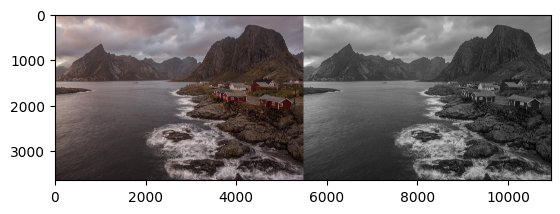

In [4]:
img = "./images/low_contrast.jpg"

# <Why do we need grey scale? Read the article above>
# We can use color images as input but the rest of the operations are using grayscale

img_original_BGR = cv2.imread(img)
img_original_RGB = cv2.cvtColor(img_original_BGR,cv2.COLOR_BGR2RGB)
img_gray = cv2.imread(img,cv2.IMREAD_GRAYSCALE)
img_gray_stacked_merge = cv2.cvtColor(img_gray,cv2.COLOR_GRAY2BGR)

img_original_gray = np.hstack((img_original_RGB, img_gray_stacked_merge))

plt.imshow(img_original_gray)
plt.show()

## Displaying Histogram
If you are curious about the histogram shape of your original image. below is the code to generate a simple plot.

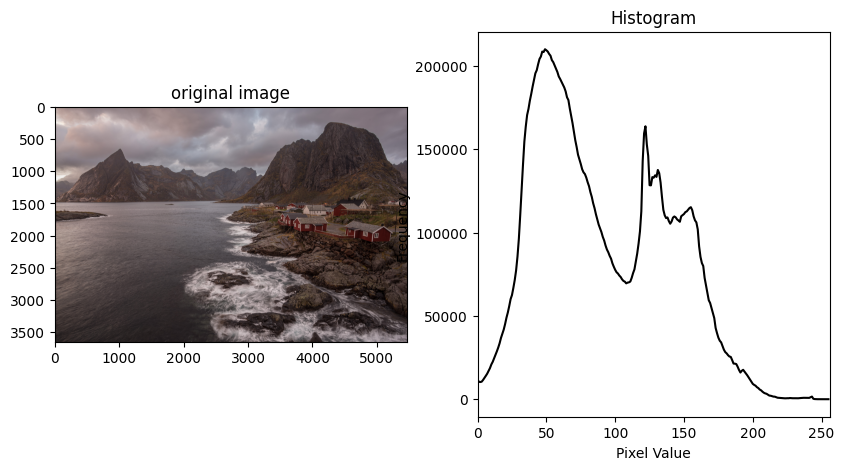

In [6]:
# Calculate the histogram
hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])

# Reshape the histogram for plotting
hist = hist.reshape(-1)
plt.figure(figsize=(10, 5))  # Create a figure with a specified size
plt.subplot(1, 2, 1)  # Subplot for the original image
plt.imshow(cv2.cvtColor(img_original_BGR, cv2.COLOR_BGR2RGB))
plt.title("original image")

plt.subplot(1, 2, 2)  # Subplot for the original image
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.plot(hist, color='black')
plt.xlim([0, 256])
plt.show()


**Different Way**

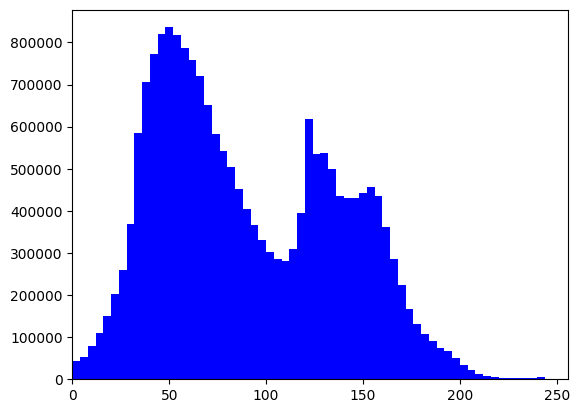

In [8]:
# If we have a very colorful image, use more bins to see finer distribution
bins = 64
plt.hist(img_gray.flatten(),bins=bins,range=[0,256], color = 'b')
plt.xlim([0,256])
plt.show()

## Perform Histogram Equalization
Applications of Histogram Equalization:
1. Medical Imaging: Used to enhance medical images like X-rays, MRIs, and CT scans, histogram equalization makes subtle details more visible, aiding in the detection of abnormalities and improving diagnostic accuracy.

2. Satellite and Remote Sensing: Applied to satellite imagery, histogram equalization enhances visibility of features on the Earth's surface, crucial for tasks like land cover classification and environmental monitoring.

3. Computer Vision: In tasks such as object detection, recognition, and tracking, histogram equalization improves image contrast, making objects and features easier to distinguish.

4. Photography and Image Editing: Image editing tools use histogram equalization to adjust contrast and brightness, particularly useful for correcting underexposed or overexposed photos.

5. Historical Image Restoration: It helps restore old, deteriorated images by enhancing quality and recovering details, making historical photos and documents clearer and more accessible.

6. Astronomy: In astronomical image processing, histogram equalization brings out hidden details in images of celestial objects, facilitating the study of distant galaxies, stars, and other phenomena.

7. Enhancing Low-Light Images: For images captured in low-light conditions, histogram equalization improves visibility and reveals obscured details.

8. Ultrasound Imaging: Applied in ultrasound imaging, it helps enhance the visibility of internal structures, supporting more accurate diagnoses.

9. Forensic Analysis: In forensic science, it is used to enhance surveillance footage and images, helping to better identify people and objects.

10. Document Scanning and OCR: Histogram equalization enhances the quality of scanned documents, making text and illustrations clearer and improving the accuracy of optical character recognition (OCR).

11. Enhancing Historical and Cultural Artifacts: Used in preserving historical manuscripts, paintings, and artifacts, it reveals faded or degraded details, aiding in study and restoration.

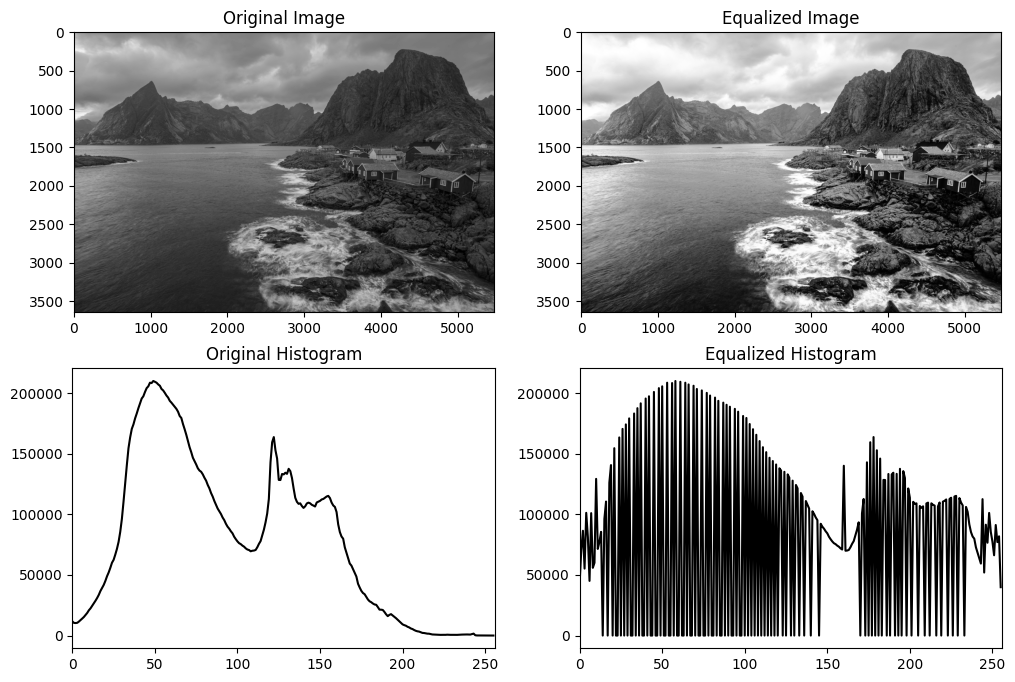

In [9]:
# Apply histogram equalization
equalized_image = cv2.equalizeHist(img_gray)

# Calculate histograms for the original and equalized images
hist_original = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Plot the original and equalized images along with their histograms
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(img_gray, cmap='gray')

plt.subplot(2, 2, 2)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')

plt.subplot(2, 2, 3)
plt.title('Original Histogram')
plt.plot(hist_original, color='black')
plt.xlim([0, 256])

plt.subplot(2, 2, 4)
plt.title('Equalized Histogram')
plt.plot(hist_equalized, color='black')
plt.xlim([0, 256])

plt.show()

## RBG Histogram Equalization

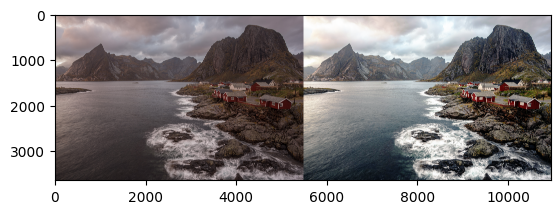

In [10]:
blue_channel_HistoEqualised = cv2.equalizeHist(img_original_BGR[:,:,0])
green_channel_HistoEqualised = cv2.equalizeHist(img_original_BGR[:,:,1])
red_channel_HistoEqualised = cv2.equalizeHist(img_original_BGR[:,:,2])
RGB_merge_HistoEqualised=cv2.merge((red_channel_HistoEqualised ,green_channel_HistoEqualised ,blue_channel_HistoEqualised))
img_originalRGB_RGBHE = np.hstack((img_original_RGB,RGB_merge_HistoEqualised))
plt.imshow(img_originalRGB_RGBHE)
plt.show()

## We need to enhance our results with CLAHE.

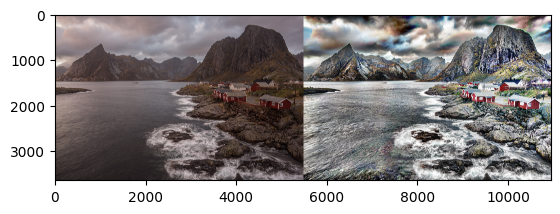

In [11]:
# OpenCV says the settings are optional... what does it mean?
clahe = cv2.createCLAHE()
blue_channel_clahe = clahe.apply(img_original_BGR[:,:,0])
green_channel_clahe = clahe.apply(img_original_BGR[:,:,1])
red_channel_clahe = clahe.apply(img_original_BGR[:,:,2])
RGB_merge_CLAHE=cv2.merge((red_channel_clahe,green_channel_clahe,blue_channel_clahe))
img_originalRGB_RGBCLAHE = np.hstack((img_original_RGB,RGB_merge_CLAHE))
plt.imshow(img_originalRGB_RGBCLAHE)
plt.show()

It's important to carefully adjust the **clip** parameter (default value: 40), which sets the contrast limit. Higher values can lead to abrupt changes in intensity distribution, potentially introducing artifacts that were not present in the original image.

Another key parameter is **tileGridSize**, which influences the localization of contrast adjustment. This setting divides the image into a grid of squares for localized contrast limiting. For instance, if you have an 80x80 pixel image with a tileGridSize of 20x20, the image will be divided into 16 local grids for contrast calculations. For more details on these settings, refer to articles like those found on Wikipedia.

## Improving the CLAHE result

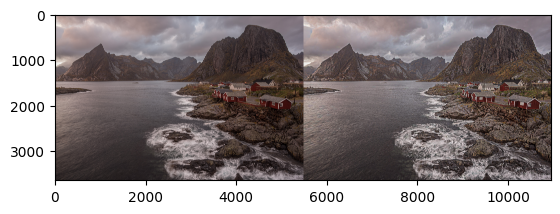

In [12]:
import math

# using the shape here in case we have a really huge photo to process and cannot decide
clahe = cv2.createCLAHE(
  clipLimit=1.15, 
  tileGridSize=(
    math.floor(img_original_BGR.shape[0]*0.03),
    math.floor(img_original_BGR.shape[1]*0.03)
  )
)
blue_channel_clahe = clahe.apply(img_original_BGR[:,:,0])
green_channel_clahe = clahe.apply(img_original_BGR[:,:,1])
red_channel_clahe = clahe.apply(img_original_BGR[:,:,2])
RGB_merge_CLAHE=cv2.merge((red_channel_clahe,green_channel_clahe,blue_channel_clahe))
img_originalRGB_RGBCLAHE = np.hstack((img_original_RGB,RGB_merge_CLAHE))
plt.imshow(img_originalRGB_RGBCLAHE)
plt.show()

## Further Enhancement by looking at RGB RAW
We know from the previous code that we were applying the same parameters of CLAHE to all 3 color channels of the image, and in doing this, we are essentially assuming a great deal that the brightness intensity of all 3 channels have the same histogram shape, but it is never the case, because our scene is not greyscale, and we used a “normal” color image.

## Tuning our CLAHE Results According to each Color Channel

Now using our eyes, we can sort of “intuitively tune” our results. Our human eyes are very good at detecting the green wavelength of light (because red and blue spectrum of white light are quite close to the lower limits and higher limits of the “visible range”), and so what happens if we apply CLAHE only on our Red and Blue color channels?

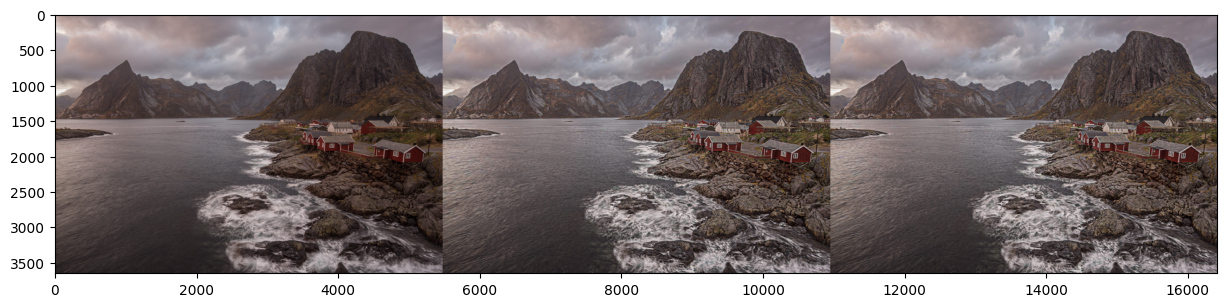

In [15]:
clahe_for_red_blue = cv2.createCLAHE(clipLimit=1.15, tileGridSize=(math.floor(img_original_BGR.shape[0]*0.03),math.floor(img_original_BGR.shape[1]*0.03)))
blue_channel_clahe_ENHANCE = clahe_for_red_blue.apply(img_original_BGR[:,:,0])
red_channel_clahe_ENHANCE = clahe_for_red_blue.apply(img_original_BGR[:,:,2])
RGB_merge_CLAHE_ENHANCE=cv2.merge((red_channel_clahe_ENHANCE ,green_channel_clahe  ,blue_channel_clahe_ENHANCE))
img_originalRGB_RGBCLAHE_ENHANCE = np.hstack((img_original_RGB, RGB_merge_CLAHE,RGB_merge_CLAHE_ENHANCE))

plt.figure(figsize=(15,20))
plt.imshow(img_originalRGB_RGBCLAHE_ENHANCE)
plt.show()